In [1]:
# In this example we use a pretrained model to perform segmentation
# here is the original code: https://www.learnopencv.com/pytorch-for-beginners-semantic-segmentation-using-torchvision/
from torchvision import models

fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T

import numpy as np

In [3]:
# we define the label colors for each type of object.
# lets say, for aeroplanes, we color the pixels red.
# for bicycles, we paint the pixels green.
def decode_segmap(image, nc=21):
    label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
  
    for l in range(0, nc):
        idx = image == l
        r[idx] = label_colors[l, 0]
        g[idx] = label_colors[l, 1]
        b[idx] = label_colors[l, 2]
    
    rgb = np.stack([r, g, b], axis=2)
    return rgb

In [4]:
def segment(net, path):
    img = Image.open(path)
    plt.imshow(img); plt.axis('off'); plt.show()
    # pytorch transforms perform operations to data step by step. it is a way to do preprocessing.
    trf = T.Compose([T.Resize(256), 
                   T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  
    # cannot input one image. instead we input a dataset composed of one image. this operation is for that, we add another dimension.
    inp = trf(img).unsqueeze(0)
    #make forward prop, take the output tensor
    out = net(inp)['out']
    # take the class prediction with the maximum probability
    om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
    #pass the class to the coloring function
    rgb = decode_segmap(om)
    #draw the colored image
    plt.imshow(rgb); plt.axis('off'); plt.show()

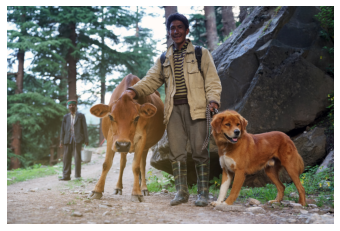

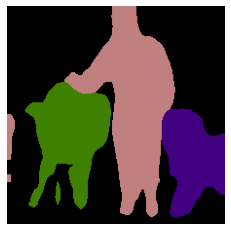

In [9]:
#!curl https://images.pexels.com/photos/2385051/pexels-photo-2385051.jpeg
#!ls
# point out the resize!
segment(fcn, './segmentation.jpeg')